In [28]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
from scipy import stats

In [29]:
path = r"input_files/*.csv"                # The path requires "".csv" at end of file name. 
                                                                 # This is to prevent the program from blowing up
                                                                 # when it hits some kind of hidden file. 

countries_df = pd.read_csv(glob.glob(path)[0], header=0)           # Sets up main dataframe with data from FIRST file
string = str(glob.glob(path)[0])                                 # in the folder.
country_name, = re.findall(r"/(.*)_tracks", string)   # This line extracts the year and month from the 
countries_df[['Country']] = country_name

for file in glob.glob(path)[1:]:                                 # Now that you have the dataframe set up from the 
        temp_df = pd.read_csv(file, header=0)                    # first file in the folder, this iterates through 
        string = str(file)                                       # remaining files
        country_name, = re.findall(r"/(.*)_tracks", string)
        temp_df[['Country']] = country_name
        #print (country_name)
        countries_df = pd.concat([countries_df,        # Adds temperary datafame to end of main dataframe
                                       temp_df])                 # as new rows.       
                                                 

countries_df                                                # You should get 4,800 rows (24 months x 200 
                                                                 # tracks per month)

,Position,Track Name,Artist,Streams,URL,Year,Month,Track ID,Danceability,Energy,Valence,Stream %,Danceability_Stream%,Valence_Stream%,Energy_Stream%,Country,yyyy-mm,Tempo,Tempo_Stream%
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,1,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,0.327,0.001410,0.001097,0.000461,0.000447,Global,NaN,NaN,NaN
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,0.913,0.000975,0.000741,0.000890,0.000467,Global,NaN,NaN,NaN
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,1,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,0.388,0.000866,0.000718,0.000336,0.000467,Global,NaN,NaN,NaN
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,1,7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,0.662,0.000703,0.000638,0.000465,0.000470,Global,NaN,NaN,NaN
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,1,7DnAm9FOTWE3cUvso43HhI,0.720,0.706,0.620,0.000692,0.000498,0.000429,0.000488,Global,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,196,"Tujhe Kitna Chahein Aur (Film Version) [From ""...",Jubin Nautiyal,272866,https://open.spotify.com/track/3lT4SlZVvqLhMei...,2020,12,3lT4SlZVvqLhMeiuBv7gHW,0.358,0.252,0.284,0.000252,0.000090,0.000072,0.000063,India,NaN,NaN,NaN
4746,197,Mera Bhai,DIVINE,272385,https://open.spotify.com/track/3v3FEONiwvufayP...,2020,12,3v3FEONiwvufayPNcWzHhc,0.663,0.810,0.464,0.000251,0.000167,0.000117,0.000204,India,NaN,NaN,NaN
4747,198,Fallin for You,Shrey Singhal,272266,https://open.spotify.com/track/3uOh60vBloFwAv1...,2020,12,1le5KVGTF1xWf2aUj7ruLy,0.644,0.834,0.593,0.000251,0.000162,0.000149,0.000210,India,NaN,NaN,NaN
4748,199,"Hey Idi Nenena (From ""Solo Brathuke So Better"")",Thaman S,271156,https://open.spotify.com/track/4GC2IwmYrlC12Yf...,2020,12,4GC2IwmYrlC12YfPfHPLQe,0.770,0.834,0.628,0.000250,0.000193,0.000157,0.000209,India,NaN,NaN,NaN


In [30]:
countries_to_plot = sorted(list(countries_df['Country'].unique()))
countries_to_plot = ['Global', 'Brazil',
 'Germany',
 'India',
 'Italy',
 'Mexico',
 'New Zealand',
 'Spain',
 'United Kingdom',
 'United States']
countries_to_plot

['Global',
 'Brazil',
 'Germany',
 'India',
 'Italy',
 'Mexico',
 'New Zealand',
 'Spain',
 'United Kingdom',
 'United States']

In [32]:
#country_df = countries_df[countries_df['Country'] == 'India']

#country_groupby = country_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()

#valence_2019 = country_groupby[country_groupby['Year'] == 2019]

#valence_2020 = country_groupby[country_groupby['Year'] == 2020]

#print (valence_2019, valence_2020)

In [95]:
# Set up some basic plt formatting configurations

plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

# Create a function to match labels to a the correlation r coefficients. This will come in handy below 

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"
    
def p_label(p):
    if p <= .05 : return "significant"
    else: return "insignificant"

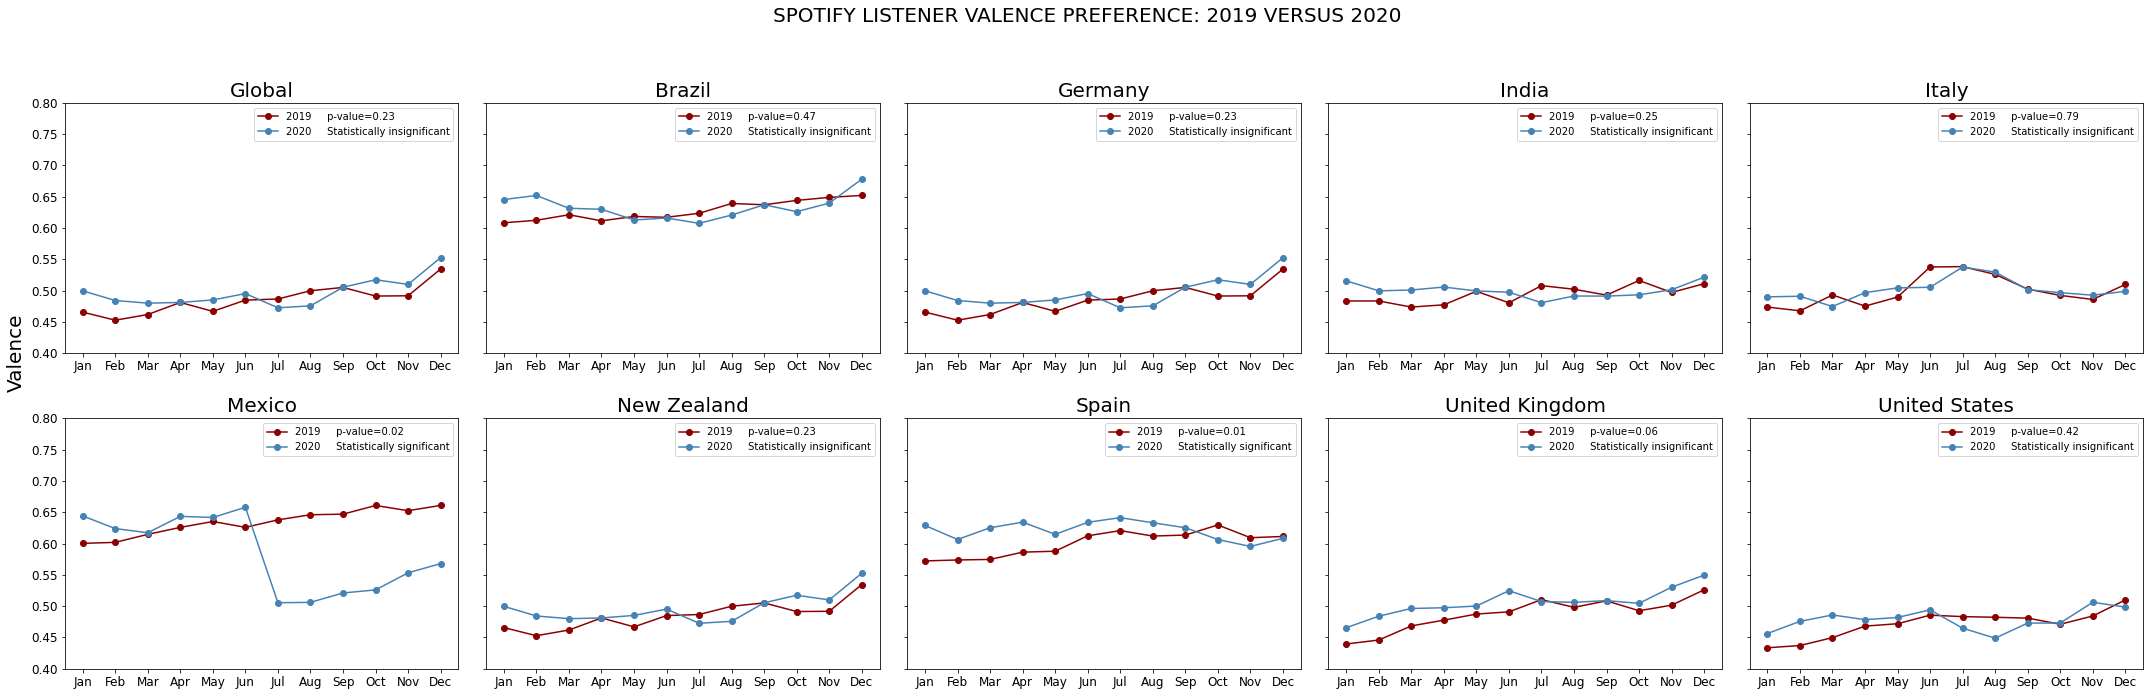

In [100]:
# Plot a comparison of 2019 2020 variable averages

variable_to_plot = 'Valence'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):
    
    country_df = countries_df[countries_df['Country'] == countries_to_plot[i]]
    
    country_groupby = country_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()

    variable_2019 = country_groupby[country_groupby['Year'] == 2019]

    variable_2020 = country_groupby[country_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    



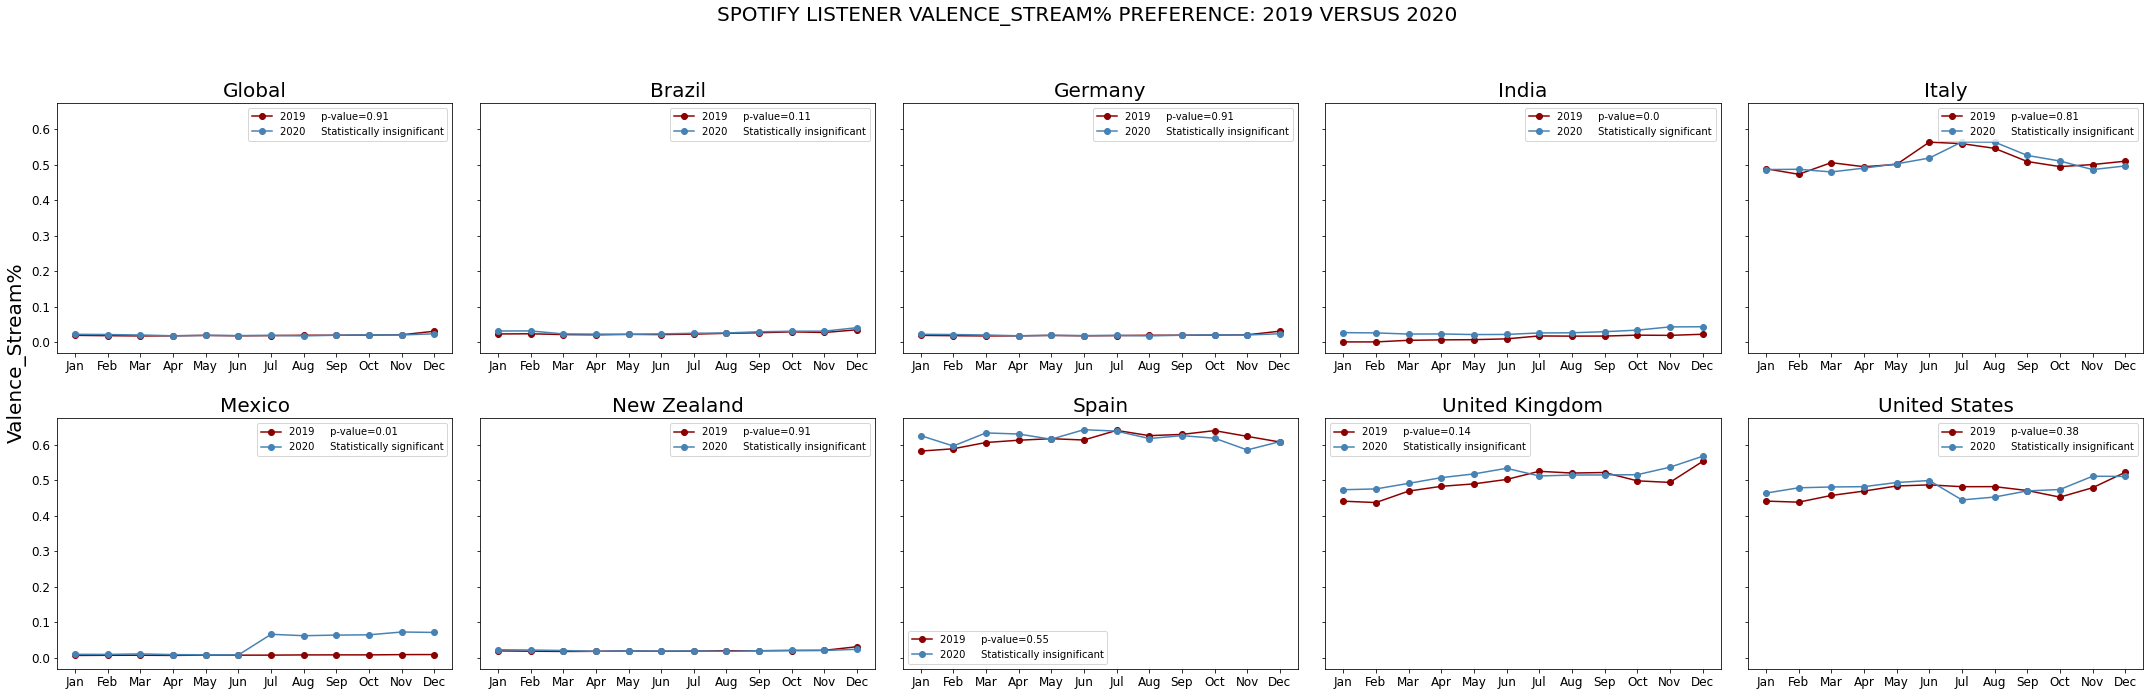

In [101]:
# Plot a comparison of 2019 2020 variable weighted averages

variable_to_plot = 'Valence_Stream%'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):
    
    country_df = countries_df[countries_df['Country'] == countries_to_plot[i]]
    
    country_groupby = country_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].sum()

    variable_2019 = country_groupby[country_groupby['Year'] == 2019]

    variable_2020 = country_groupby[country_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    #plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    



In [ ]:
# Scatter plot comparison of 2020 data and covid variables

variable_to_plot = 'Valence'

fig, ((ax0, ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8, ax9)) = plt.subplots(2,5, sharey=True, figsize=(30,10))    # Set up figure for subplots

plot_list = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]  # Set up list of plots to help with the for loop below

plt.subplots_adjust(hspace=.3, wspace=0.05)                     # Formatting        

fig.suptitle(f"SPOTIFY LISTENER {variable_to_plot.upper()} PREFERENCE: 2019 VERSUS 2020\n",  size=20)     # Set title for the whole figure

fig.text(0, .5, f"{variable_to_plot}",           # Set label for shared y axis. This seemed to be
         va='center', rotation='vertical', fontsize=20,         # the easiest way. 
         linespacing = 2)  

# Set up lists to plot

for i in range(10):
    
    country_df = countries_df[countries_df['Country'] == countries_to_plot[i]]
    
    country_groupby = country_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()

    variable_2019 = country_groupby[country_groupby['Year'] == 2019]

    variable_2020 = country_groupby[country_groupby['Year'] == 2020]
            
    pvalue = stats.ttest_ind(variable_2019[f'{variable_to_plot}'], variable_2020[f'{variable_to_plot}'], equal_var=False)[1]
    plabel = p_label(pvalue)                                  # Call function to create a label for the p value
    
    #valence_2020.drop('Year', inplace=True, axis=1)
    
    y_axis = variable_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
             
    #plot_list[i].set_xlabel(f"Months")                   # Set x axis label for subplot   

    plot_list[i].set_title(f"{countries_to_plot[i]}")       # Set title for subplot

    plot_list[i].plot(x_axis, variable_2019[variable_to_plot], label=f"2019     p-value={round(pvalue, 2)}", marker='o', color='darkred')  # Plot 2019
    plot_list[i].plot(x_axis, variable_2020[variable_to_plot], 
                      label=f"2020     Statistically {plabel}", marker='o', color='steelblue')  # Plot 2020

    #plot_list[i].xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plot_list[i].set_ylim([.4, .8])

    plot_list[i].legend(fontsize=10)                                   # Add the legend

fig.tight_layout(pad=2)   


plt.savefig(f"output_files/{variable_to_plot}.png")        # Save the png file   
plt.show()
    

